# Desafio Opcional I
* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente.
#### Las 25 preguntas son:
* A1 Soy indiferente a los sentimientos de otros.
* A2 Me preocupo del bienestar de otros.
* A3 Sé cómo confortar a otros.
* A4 Me agradan los niños.
* A5 Hago sentir tranquila a la gente.
* C1 Soy exacto en mi trabajo.
* C2 Sigo con mis tareas hasta que todo esté perfecto.
* C3 Hago cosas siguiendo un plan.
* C4 Hago cosas con el mínimo esfuerzo.
* C5 Pierdo mi tiempo.
* E1 No hablo mucho con las personas.
* E2 Me es difícil acercarme a otros.
* E3 Sé cómo cautivar a la gente.
* E4 Hago amigos de forma fácil.
* E5 Puedo tomar el cargo de las cosas.
* N1 Me enojo con facilidad.
* N2 Me irrito con facilidad.
* N3 Tengo cambios de humor frecuentes.
* N4 Usualmente me siento melancólico.
* N5 Entró en pánico con facilidad.
* O1 Estoy lleno de ideas.
* O2 Evito leer material difícil.
* O3 Tiendo a llevar la conversación a niveles más altos.
* O4 Dedico tiempo a la reflexión de cosas.
* O5 No profundizaré sobre una materia específica.

* gender Hombre = 1, Mujer =2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* age Edad en Años.

### Desafio 1: Lectura de Archivos
* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos bfi.csv y asígnela a un objeto df.
* Solicite las primeras 5 observaciones con head.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn')

import missingno as msngo
import factor_analyzer as fact

In [3]:
df = pd.read_csv('bfi.csv')
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
* Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.sample()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
596,5.0,6.0,2.0,6.0,5.0,4.0,5.0,4.0,2.0,4.0,...,2.0,3.0,6.0,2,2.0,1.0,1.0,2,3.0,25


In [31]:
df.shape

(2800, 28)

<AxesSubplot:>

<Figure size 400x400 with 0 Axes>

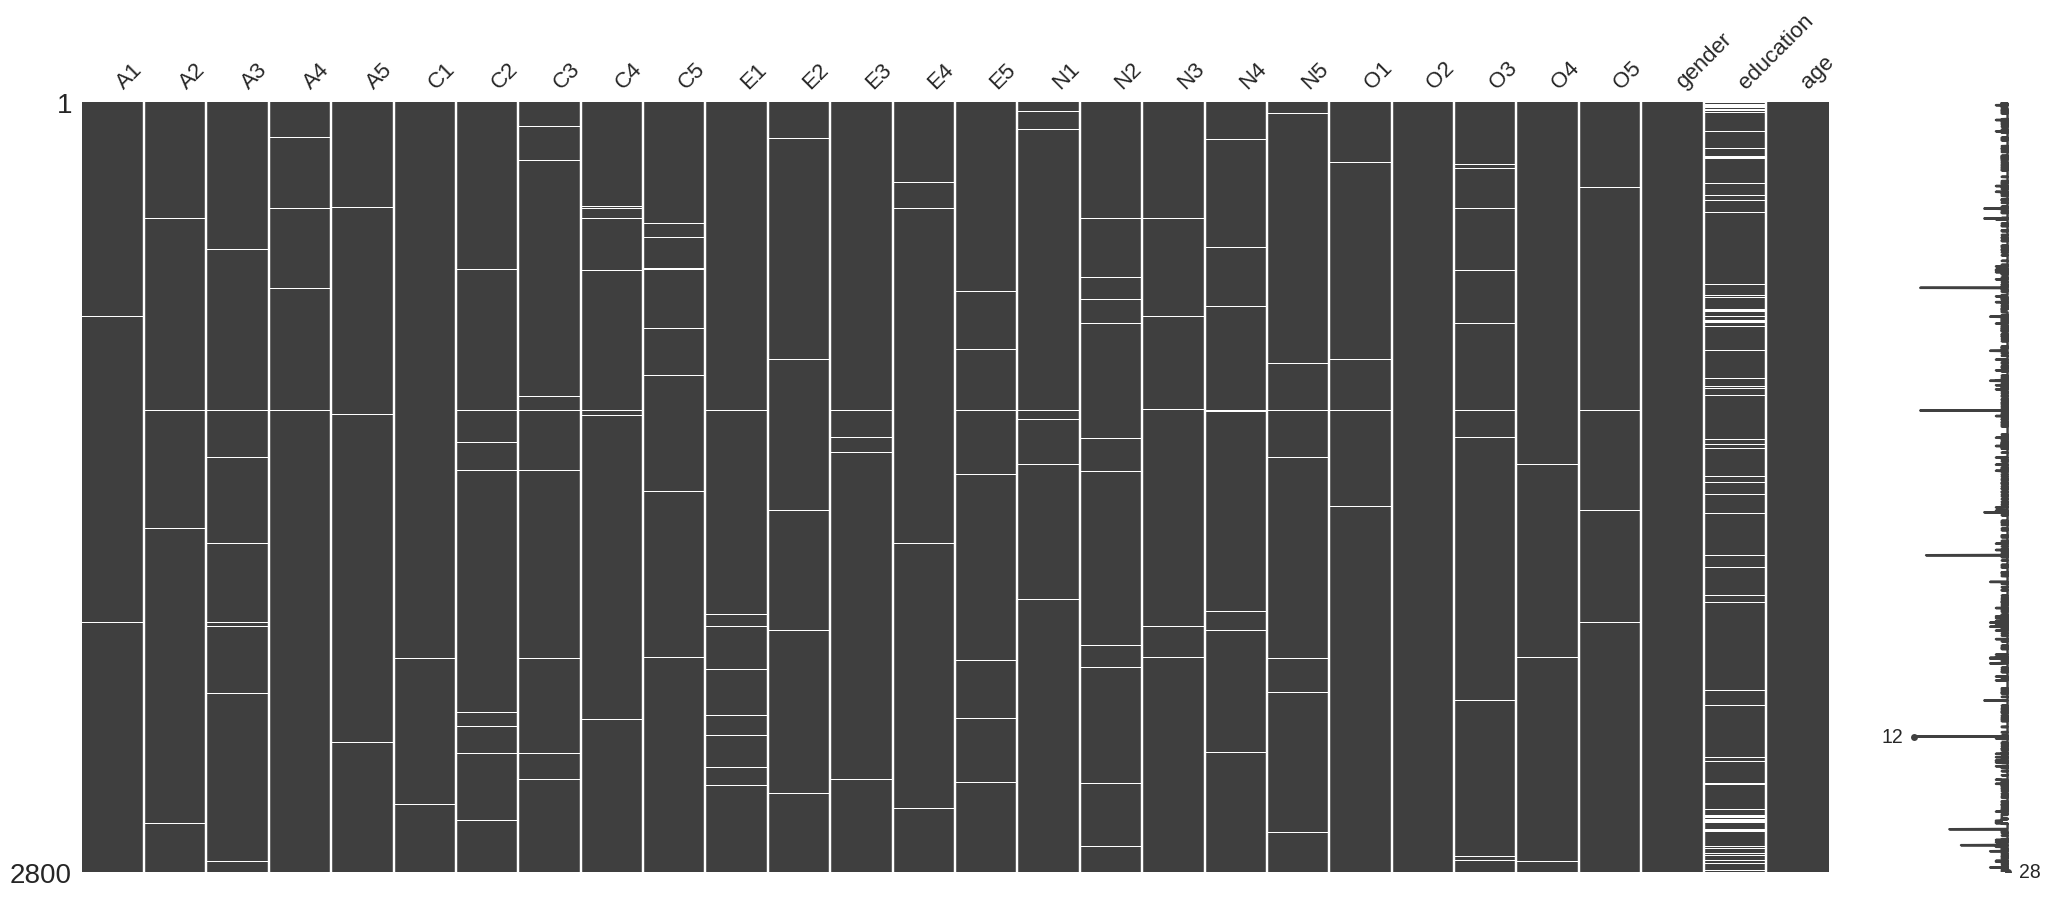

In [34]:
plt.figure(figsize=(4,4))
msngo.matrix(df)

In [117]:
for index, row in df.iteritems():
    try:
        print(f'''{index}: {np.round(row.isna().value_counts('%')[True],3)}''')
    except:
        pass

A1: 0.006
A2: 0.01
A3: 0.009
A4: 0.007
A5: 0.006
C1: 0.008
C2: 0.009
C3: 0.007
C4: 0.009
C5: 0.006
E1: 0.008
E2: 0.006
E3: 0.009
E4: 0.003
E5: 0.008
N1: 0.008
N2: 0.008
N3: 0.004
N4: 0.013
N5: 0.01
O1: 0.008
O3: 0.01
O4: 0.005
O5: 0.007
education: 0.08


Las columnas con mayor NA son A2, N5, O3 y education por sobre todo con un 8%

In [123]:
df_clean = df.dropna().copy()

In [133]:
df.shape[0]

2800

In [129]:
df_clean.shape[0]

2236

In [131]:
1 - (df_clean.shape[0] / df.shape[0])

0.2014285714285714

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería depreguntas a extraer.

In [150]:
no_quest = ['gender', 'education', 'age']
df_clean_q = df_clean.drop(columns=no_quest, axis=1).copy()
df_clean_q.sample()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
2574,5.0,2.0,3.0,2.0,4.0,6.0,5.0,4.0,2.0,4.0,...,6.0,6.0,4.0,2.0,1.0,6.0,5,4.0,6.0,2.0


In [151]:
df_clean_q.shape

(2236, 25)

* Reporte las medias para cada una de las preguntas de la batería.Esto lo puede lograr con un dotplot.

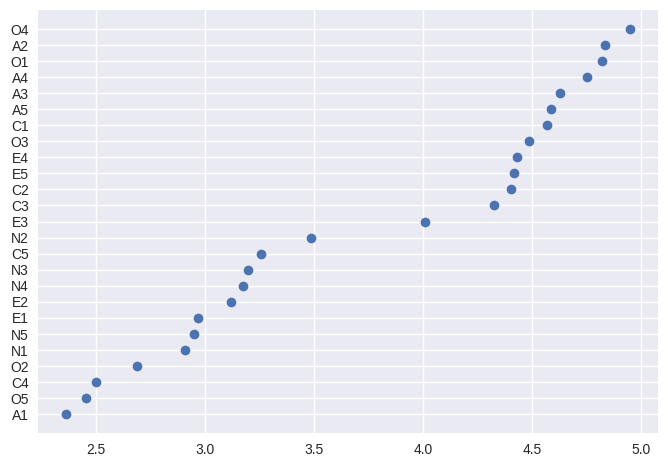

In [152]:
variable = []
mean = []
for colname, serie in df_clean_q.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
df = pd.DataFrame({'var':variable, 'mean':mean}).sort_values(by=['mean'])
plt.plot(df['mean'], df['var'],'o')

* Genere una matriz de correlaciones con este nuevo objeto.Visualízalo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

<AxesSubplot:>

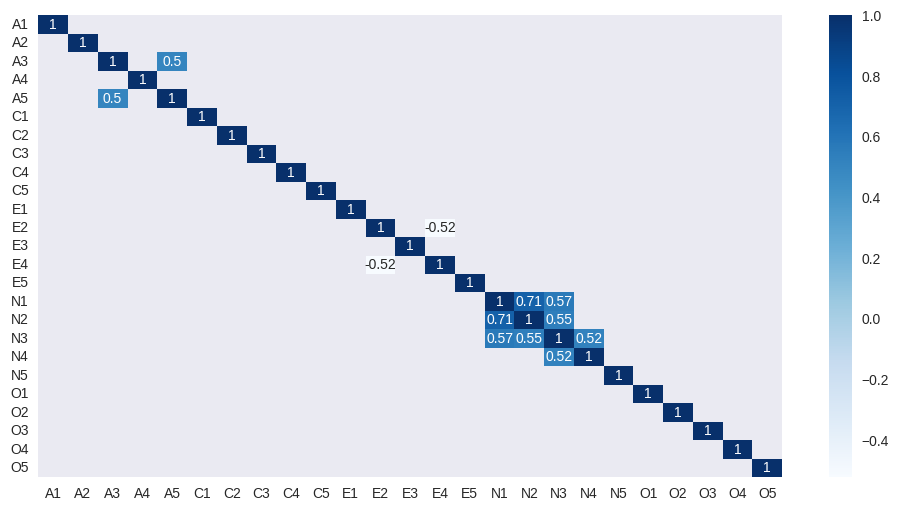

In [173]:
plt.figure(figsize=(12,6))
df_clean_q_corr = df_clean_q.corr().copy()
sns.heatmap(data=df_clean_q_corr[np.absolute(df_clean_q_corr) >=.5],
            cmap='Blues',annot=True)

* Solo una es correlacion fuerte con 0.71, entre N1 y N2
    - N1 Me enojo con facilidad.
    - N2 Me irrito con facilidad.
* La segunda relacion mas relevante es de 0.57 entre N1 y N3
    - N1 Me enojo con facilidad.
    - N3 Tengo cambios de humor frecuentes.
* Relacion inversa se ve entre E2 y E4
    - E2 Me es difícil acercarme a otros.
    - E4 Hago amigos de forma fácil.


### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.

In [174]:
fact.calculate_bartlett_sphericity(df_clean_q)

(16509.673550497246, 0.0)

* Rechazo $H{o}$ : no estamos frente a un a matriz identidad

In [184]:
lista_kmo = fact.calculate_kmo(df_clean_q)
for n, i in enumerate(lista_kmo[0]):
    if i <= 0.7:
        print(f'{df_clean_q.columns[n]} : {i}')
    else:
        print(f'{df_clean_q.columns[n]}: {np.round(i,3)} => Pasa')
print(f'Modelo: {np.round(lista_kmo[1],3)}')

A1: 0.738 => Pasa
A2: 0.834 => Pasa
A3: 0.872 => Pasa
A4: 0.87 => Pasa
A5: 0.901 => Pasa
C1: 0.838 => Pasa
C2: 0.788 => Pasa
C3: 0.849 => Pasa
C4: 0.824 => Pasa
C5: 0.862 => Pasa
E1: 0.842 => Pasa
E2: 0.884 => Pasa
E3: 0.893 => Pasa
E4: 0.878 => Pasa
E5: 0.894 => Pasa
N1: 0.778 => Pasa
N2: 0.778 => Pasa
N3: 0.86 => Pasa
N4: 0.886 => Pasa
N5: 0.86 => Pasa
O1: 0.855 => Pasa
O2: 0.784 => Pasa
O3: 0.834 => Pasa
O4: 0.781 => Pasa
O5: 0.758 => Pasa
Modelo: 0.847


#### Todas las variables son utiles para continuar. Al igual que el modelo

* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.

In [187]:
fact_10_norot = fact.FactorAnalyzer(n_factors=10)
fact_10_norot

FactorAnalyzer(n_factors=10, rotation_kwargs={})

In [188]:
fact_10_norot.fit(df_clean_q)
fact_10_eigenval = fact_10_norot.get_eigenvalues()[0]
fact_10_eigenval

array([5.06851622, 2.7624793 , 2.152623  , 1.89233295, 1.51753291,
       1.07882932, 0.83090573, 0.80450025, 0.7140883 , 0.7015381 ,
       0.6808421 , 0.64897347, 0.63125633, 0.58803197, 0.5659652 ,
       0.54483958, 0.51993349, 0.49386855, 0.48273618, 0.44250032,
       0.42887063, 0.40709741, 0.38887531, 0.38476259, 0.2681008 ])

* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

Text(0.5, 1.0, 'Scree plot')

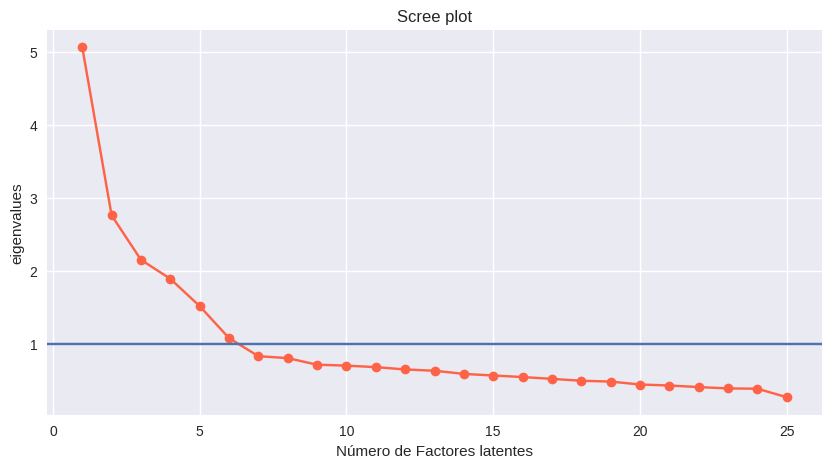

In [194]:
plt.figure(figsize=(10,5))

plt.plot(np.arange(1,len(fact_10_eigenval) + 1), fact_10_eigenval, 'o-',color='tomato')
plt.xlabel('Número de Factores latentes')
plt.ylabel('eigenvalues')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title('Scree plot')

* Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

In [195]:
fact_6 = fact.FactorAnalyzer(n_factors=6)
fact_6.fit(df_clean_q)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

* Extraiga las cargas del modelo e identifique qué ítems están asociados a cada λ factor. Comente sobre qué significa cada factor construído.

In [198]:
fact_6.loadings_.shape

(25, 6)

In [199]:
loading_df = pd.DataFrame(fact_6.loadings_,
                         columns=['F1','F2','F3',
                                'F4','F5','F6',],
                          index=df_clean_q.columns)
loading_df

,F1,F2,F3,F4,F5,F6
A1,0.044246,0.087326,0.106308,0.147752,-0.623217,0.174737
A2,0.113686,0.179650,0.058154,-0.025989,0.639541,-0.039742
A3,0.004894,0.269066,0.025713,0.020732,0.489930,0.186803
A4,-0.047633,0.129251,0.190336,0.182471,0.324844,0.060074
A5,-0.164942,0.323591,-0.013865,0.029803,0.314084,0.285151
C1,0.035324,-0.041623,0.588791,-0.138188,-0.076776,-0.002966
C2,0.081360,-0.121824,0.737840,-0.012264,-0.039509,0.038298
C3,0.015704,-0.077021,0.608281,0.055442,0.043901,-0.104278
C4,0.025907,0.020554,-0.671731,0.116555,-0.140572,0.480149
C5,0.153253,-0.087395,-0.555096,-0.065150,-0.003403,0.236204


<AxesSubplot:>

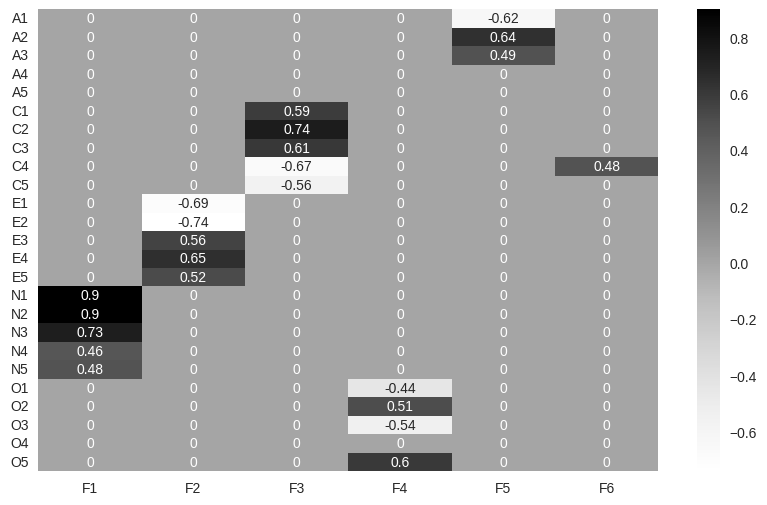

In [202]:
plt.figure(figsize=(10,6))
factor_loadings = loading_df.applymap(lambda x: np.where(np.abs(x) < .4,0,round(x,2)))
sns.heatmap(factor_loadings,cmap='Greys', annot=True)

* Los valores mas altos los asociamos con un alto nivel de representacion del encuestado: 'Me representa completamente'. Al contrario los valores negativos que nos estarian indicando una fuerte relacion hacia: 'No me representa para nada'.
* Observamos como cada factor se enfoca en distintos grupos de variables.
    - F1: N* Neuroticismo
    - F2: E* Extroversión
    - F3: C* Escrupulosidad
    - F4: O*  Apertura
    - F5: A* Amabilidad
    - F6: C4 Hago cosas con el min esfuerzo

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.


In [209]:
scores = fact_6.transform(df_clean_q)
scores.shape

(2236, 6)

In [212]:
df_scores = pd.DataFrame(scores,
                         columns=['F1','F2','F3',
                                'F4','F5','F6',],) 
df_scores

,F1,F2,F3,F4,F5,F6
0,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786
...,...,...,...,...,...,...
2231,0.602248,0.834597,0.184898,1.169762,-0.399820,1.404198
2232,-1.558568,1.657646,-0.726490,-0.527137,-1.180325,-0.499578
2233,0.744488,-0.254111,0.728326,-1.054909,-0.899845,-0.480255
2234,0.129721,1.003899,-0.166139,-0.762935,-2.139689,-0.363081


* Grafique la densidad de cada uno con kdplot.

<AxesSubplot:ylabel='Density'>

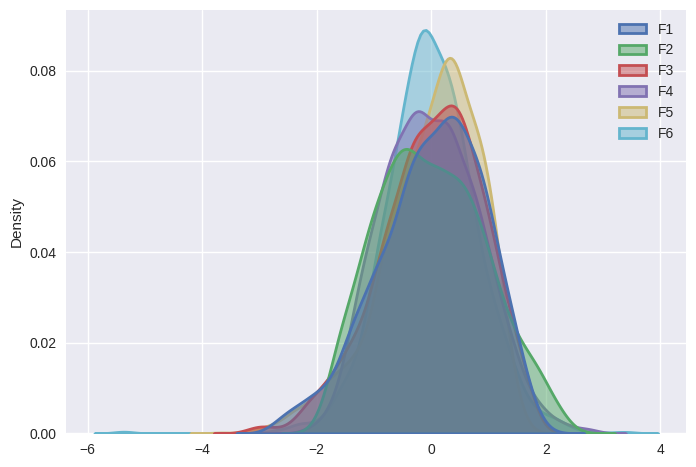

In [221]:
sns.kdeplot(data=df_scores, fill=True, alpha=.5, linewidth=2)


* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
![Formula](d5.png)

In [223]:
from sklearn.decomposition import PCA
dimred = PCA(n_components = 1)
project_x = dimred.fit_transform(df_scores)
project_x

array([[-1.5615232 ],
       [ 3.29465312],
       [ 0.11787638],
       ...,
       [-0.59171543],
       [ 1.26107479],
       [ 2.02109386]])

In [235]:
df_y = pd.DataFrame(project_x, columns=['y'])
df_y

,y
0,-1.561523
1,3.294653
2,0.117876
3,0.641164
4,-0.100879
...,...
2231,-0.052087
2232,2.435311
2233,-0.591715
2234,1.261075


In [232]:
df_clean.sample(0)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age


In [234]:
df_regresores = df_clean.loc[:,no_quest].copy()

In [236]:
df_prediccion = pd.concat([df_regresores, df_y], axis=1)
df_prediccion.sample()

,gender,education,age,y
1896,2.0,5.0,50.0,0.319483


In [237]:
join_Reg = '+'.join(no_quest)
join_Reg

'gender+education+age'

In [238]:
import statsmodels.formula.api as smf
model = smf.ols(f'y ~ {join_Reg}', data=df_prediccion).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02033
Date:                Tue, 24 Jan 2023   Prob (F-statistic):              0.996
Time:                        23:57:11   Log-Likelihood:                -3057.3
No. Observations:                1804   AIC:                             6123.
Df Residuals:                    1800   BIC:                             6145.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0119      0.159      0.075      0.940      -0.299       0.323
gender        -0.0106      0.067     -0.159      0.873      -0.141       0.120
education     -0.0054      0.029     -0.186      0.853      -0.062       0.051
age           2.7e-05      0.003      0.009      0.993      -0.006       0.006
==============================================================================
Omnibus:                       38.807   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.785
Skew:                           0.364   Prob(JB):                     1.39e-09
Kurtosis:                       3.108   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""